# Radiative Equilibrium with Simple Physics
----------------------------------

This demo steps the grey radiation code forward in time to get a radiative equilibrium
profile. In addition, the Simple Physics module is available to add a boundary layer and
large scale condensation.

This notebook shows how to configure Simple Physics to only provide those tendency terms
that are needed for the simulation. In the first example below, large scale condensation
is switched off, and in the second it is switched on. This makes a difference in the 
final profiles obtained: with large scale condensation, the boundary layer temperatures
are warmer, and the vapour profile is significantly changed.

Using netCDF4 interface for IO
Finished initialising emanuel convection scheme


<IPython.core.display.Javascript object>


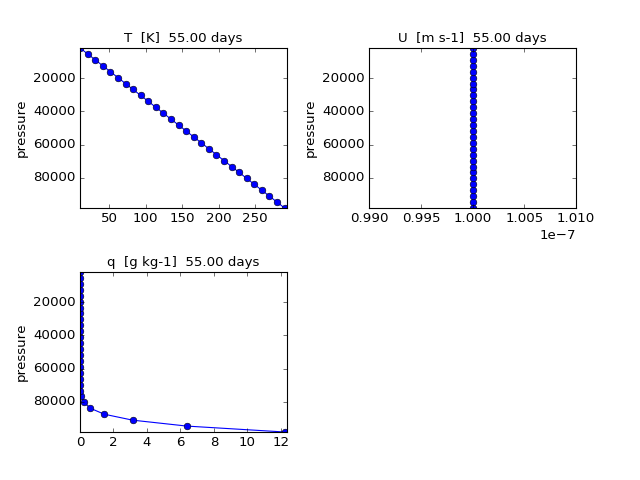

T
[[[ 283.15  283.15  283.15  283.15  283.15  283.15  283.15  283.15  283.15
    283.15  283.15  283.15  283.15  283.15  283.15  283.15  283.15  283.15
    283.15  283.15  283.15  283.15  283.15  283.15  283.15  283.15  283.15
    283.15]]]
U
[[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]]
q
[[[  1.00000000e-05   1.00000000e-05   1.00000000e-05   1.00000000e-05
     1.00000000e-05   1.00000000e-05   1.00000000e-05   1.00000000e-05
     1.00000000e-05   1.00000000e-05   1.00000000e-05   1.00000000e-05
     1.00000000e-05   1.00000000e-05   1.00000000e-05   1.00000000e-05
     1.00000000e-05   1.00000000e-05   1.00000000e-05   1.00000000e-05
     1.00000000e-05   1.00000000e-05   1.00000000e-05   1.00000000e-05
     1.00000000e-05   1.00000000e-05   1.00000000e-05   1.00000000e-05]]]


In [1]:
%matplotlib notebook
import numpy as np
import climt

#Initialise convection
kwargs = {}
kwargs['MonitorFields'] = ['T','U','q']


kwargs['dt'] = 1200.
conv = climt.convection(scheme='emanuelnew', **kwargs)

U = 0.*np.ones((1,1,conv.nlev))

T = ((1+np.arange(conv.nlev,dtype=np.double))[::-1]/conv.nlev)*290.
q = climt.thermodyn.qs(T, conv['p']/100.)
conv['T'] = T
conv['U'] = U
conv['q'] = q

In [2]:
for i in range(10000):
    conv.step()

KeyboardInterrupt: 

In [6]:
climt.thermodyn.es(273.16)

array(6.1144380358594)